“聚类分析是一种数据归约技术，旨在揭露一个数据集中观测值的子集。它可以把大量的观测值归约为若干个类。这里的类被定义为若干个观测值组成的群组，群组内观测值的相似度比群间相似度高。”——《R 语言实战》第二版

常用的两种聚类方法有：

1. **层次聚类（hierachical clustering）**：每个数据点为一小类，两两通过树的方式合并，直到所有的数据点汇成一类。常用算法：
   1. **单联动（single linkage）**：类 A 中的点与类 B 中的点间的最小距离。适合于细长的类。
   2. **全联动（complete linkage ）**：类 A 中的点与类 B 中的点间的最大距离。适合于相似半径的紧凑类，对异常值敏感。
   3. **平均联动（average linkage）**：类 A 中的点与类 B 中的点间的平均距离，也称为 UPGMA。适合于聚合方差小的类。
   4. **质心（centroid）**：类 A 与类 B 的质心的距离。质心的定义是“类的变量均值向量”。对异常值不敏感，但表现可能稍弱。
   5. **Ward 法（ward.D）**：两类之间的所有变量的方差分析平方和。适合于仅聚合少量值、类别数接近数据点数目的情况。

2. **划分聚类（partitioning clustering）**：事先指定类数 $K$，然后聚类。
   1. **K均值（K-means）**：
   2. **中心划分（Partitioning Around Medoids，即 PAM）**：

## 聚类步骤

聚类是一个多步骤过程。典型的步骤有 11 步。

1. **变量选取**：例如你需要对实验数据进行聚类，那么你需要仔细思考哪些变量会对聚类产生影响，而哪些变量是不需加入分析的。
2. **缩放数据**：最常用的方法是标准化，将所有变量变为 $\overline{x}=0, \mathrm{SE}(x)=1$ 的变量。
3. **筛选异常**：筛选和删除异常数据对于某些聚类方法是很重要的，这可以借助 R 的 `outliers/mvoutlier` 包。或者，你可以换用一种受异常值干扰小的方法，比如中心划分聚类。
4. **距离计算**：两个数据点间的距离度量有若干种，我们在[下一小节]({{ page.url }}#距离计算)专门讨论。
5. **选择聚类方法**：每个方法都有其优缺点，请仔细斟酌。
6. **确定一种或多种聚类方法**
7. **确定类数**：常用的方法是尝试使用不同的类数进行聚类，然后比较结果。R 中的 NbClust 包提供了一个拥有超过30个指标的 NbClust() 函数。
8. **最终方案**
9. **可视化**：层次聚类使用树状图；划分聚类使用可视化双变量聚类图。
10. **解释每个类**：通常会对每个类进行汇总统计（如果是连续型数据），或者返回类的众数/类别分布（如果含类别型数据）。
11. **验证**：聚类结果有意义吗？更换聚类方法能得到类似结果吗？R 中的 fpc, clv 与 clValid 包给出了评估函数。

## 距离计算：dist() 函数

数据点之间的距离有多种度量方法。在 R 的 `dist()` 函数参数中，默认选项 `method=euclidean`。函数中内置的距离方法选项有：

- **欧几里得距离（euclidean）**：$\mathrm{L}_2$ norm. 在拥有 $n$ 个变量的数据集中，数据点 $i$ 与 $j$ 的欧式距离是

  $$ d_{ij} = \sqrt{\sum_{k=1}^{n} (x_{ik} - x_{jk})^2} $$
  
- **最大距离（maximun）**：$\mathrm{L}_\infty$ norm. 两点之间的最大距离，即$p\to \infty$ 时的明科夫斯基距离。

- **曼哈顿距离（manhattan）**: $\mathrm{L}_1$ norm.

  $$ d_{ij} = \sum_{k=1}^{n} |x_{ik}-x_{jk}| $$
  
- **堪培拉距离（canberra）**：

  $$ d_{ij} = \sum_{k=1}^{n} (\frac{|x_{ik} - x_{jk}|}{|x_{ik} + x_{jk}|}) $$
  
- **二进制距离（binary）**：非 0 变量为 1，为 0 变量为 0.然后根据 0 的比例确定距离。

- **明科夫斯基距离（minkowski）**：$\mathrm{L}_p$ norm.

  $$ d_{ij} = \sqrt[\uproot{20} p]{\sum_{k=1}^{n} |x_{ik}-x_{jk}|^p } $$
  
  当 $p=1$ 时，即曼哈顿距离；$p=2$ 时，欧几里得距离；$p\to \infty$ 时，切比雪夫距离。

本文利用 [Iris data](https://archive.ics.uci.edu/ml/datasets/Iris)，数据内容是萼片、花瓣的长与宽。先读取数据：

In [1]:
datapath <- paste(getwd(), '/data/iris.data.csv', sep='')  # 我将其改成了 csv 格式
iris.raw <- read.csv(datapath, head=F)
head(iris.raw)

# 去掉非数值的第 5 列
iris <- iris.raw[,-c(5)]

V1,V2,V3,V4,V5
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa


###  算例：欧式距离

R 内置的 `dist()` 函数默认使用欧式距离，以下与 `dist(iris, method='euclidean')` 等同。比如我们来计算 iris 的欧氏距离：

In [2]:
iris.e <- dist(iris)
# 显示前 3 个数据点间的欧式距离。这是一个对角线全0的对称矩阵
as.matrix(iris.e)[1:3, 1:3]

,1,2,3
1,0.0000000,0.5385165,0.509902
2,0.5385165,0.0000000,0.300000
3,0.5099020,0.3000000,0.000000


## 层次聚类算例

层次聚类（HC）的逻辑是：**依次把距离最近的两类合并为一个新类，直至所有数据点合并为一个类。**

层次聚类的 R 函数是 `hclust(d, method=)` ，其中 d 通常是一个 `dist()` 函数的运算结果。

仍然使用上文的 Iris data 数据。

### 标准化

尽管标准化不一定会用到，但是这是通常的手段之一。

In [3]:
iris.scaled <- scale(iris)
head(iris)
head(iris.scaled)

V1,V2,V3,V4
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4


V1,V2,V3,V4
-0.8976739,1.0286113,-1.336794,-1.308593
-1.1392005,-0.1245404,-1.336794,-1.308593
-1.3807271,0.3367203,-1.393470,-1.308593
-1.5014904,0.1060900,-1.280118,-1.308593
-1.0184372,1.2592416,-1.336794,-1.308593
-0.5353840,1.9511326,-1.166767,-1.046525


### 树状图与热力图

层次聚类中的树状图是不可少的。一般使用欧式距离，聚类方法另行确定。

热力图不是必须的。

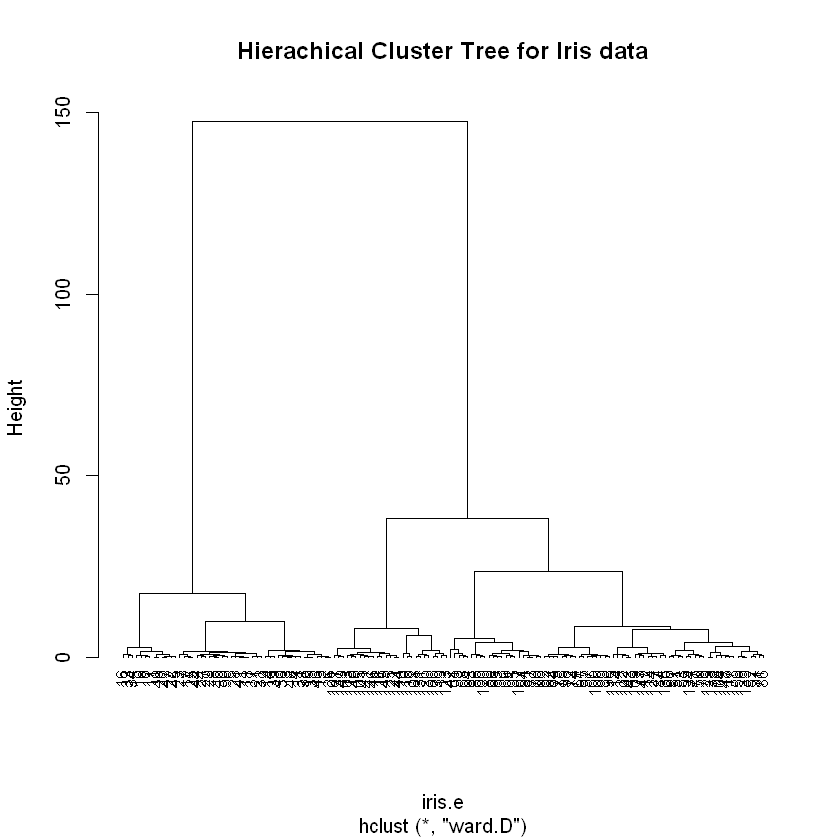

In [4]:
# 选择聚类方法
dist_method <- "euclidean"
cluster_method <- "ward.D"

iris.e <- dist(iris.scaled, method=dist_method)
iris.hc <- hclust(iris.e, method=cluster_method)
plot(iris.hc, hang=-1, cex=.8, main="Hierachical Cluster Tree for Iris data")

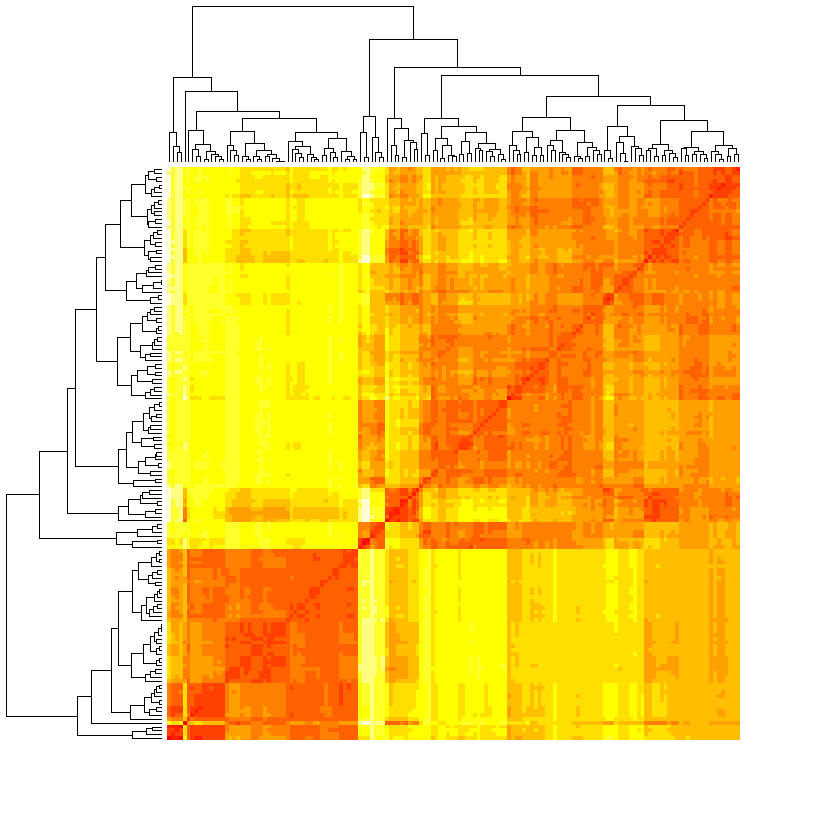

In [5]:
heatmap(as.matrix(iris.e),labRow = F, labCol = F)

### 确定聚类个数

使用 NbClust 包。

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


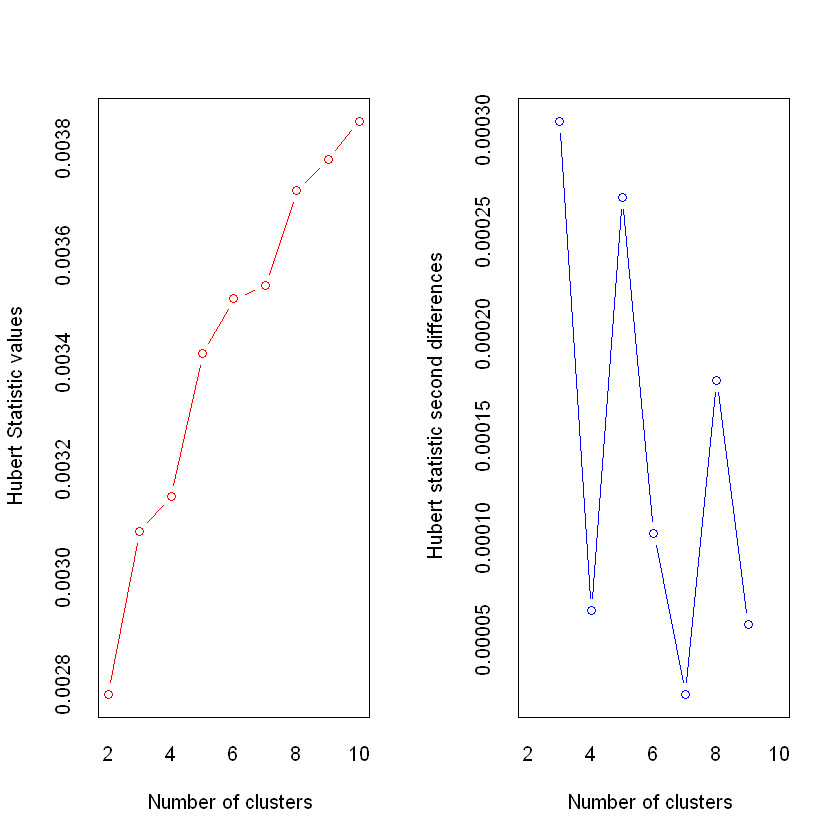

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 9 proposed 2 as the best number of clusters 
* 5 proposed 3 as the best number of clusters 
* 4 proposed 5 as the best number of clusters 
* 2 proposed 6 as the best number of clusters 
* 1 proposed 8 as the best number of clusters 
* 3 proposed 10 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
******************************************************************* 


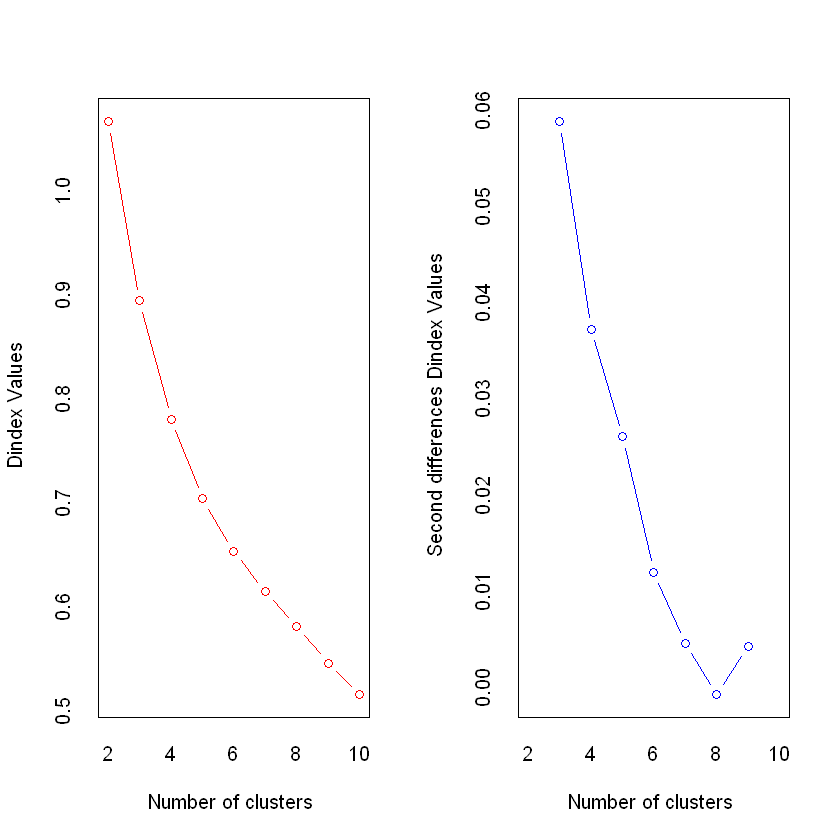

In [6]:
library(NbClust)
nc <- NbClust(iris.scaled, distance=dist_method, 
              min.nc=2, max.nc=10, method=cluster_method)


 0  2  3  5  6  8 10 
 2  9  5  4  2  1  3 

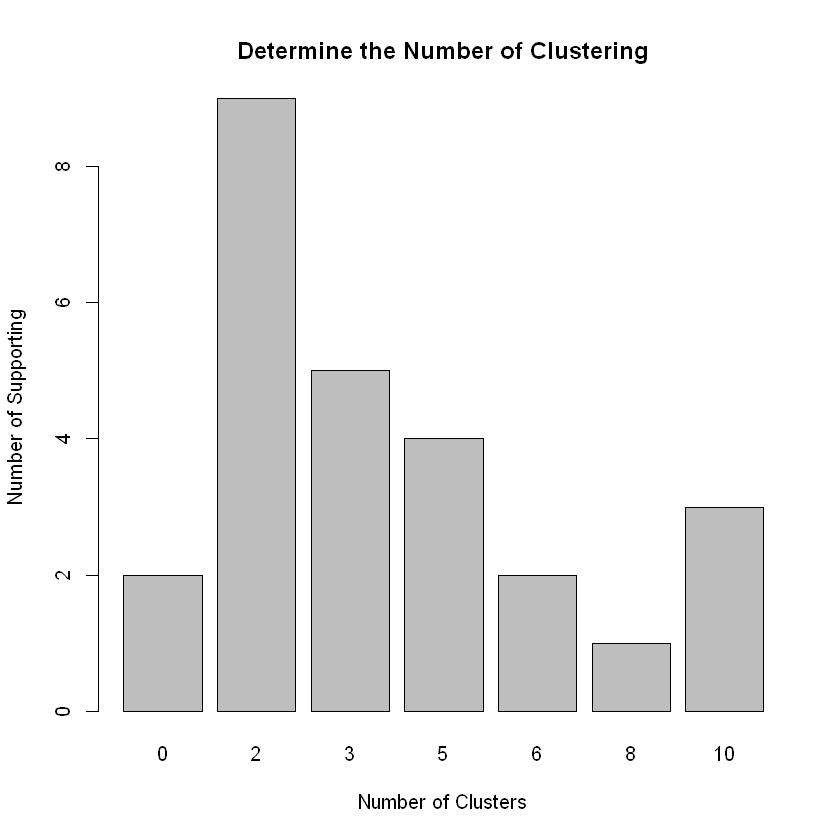

In [7]:
# 每个类数的投票数
table(nc$Best.n[1,])
barplot(table(nc$Best.n[1,]), xlab="Number of Clusters", ylab="Number of Supporting", 
        main="Determine the Number of Clustering")

### 完成聚类

从上图我们可以确定聚类数量（两类），但是原数据指出应该是三类。以下 `cutree` 以及最后一个函数中使用3类。

*注：类别已确定是 3 种。在此前提下，ward.D 下的 HC 聚类效果最好，但是 NbClust 投票建议仍是分为 2 类。 complete 下的 HC 聚类投票建议是 3 类，但是效果反而不如 ward 法。*

In [8]:
cluster_num <- 3
clusters <- cutree(iris.hc, k=cluster_num)
table(clusters)  # 每类多少个值

clusters
 1  2  3 
49 74 27 

In [9]:
# 每类的各变量中位数
aggregate(iris, by=list(cluster=clusters), median)

cluster,V1,V2,V3,V4
1,5.0,3.4,1.5,0.20
2,6.0,2.8,4.5,1.45
3,6.9,3.1,5.8,2.20


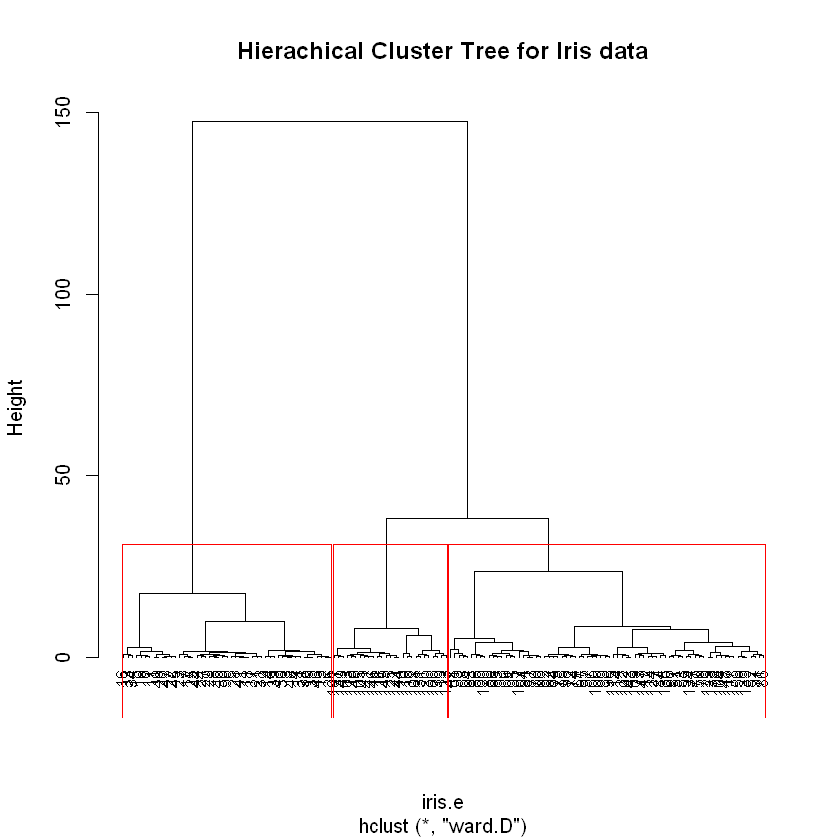

In [10]:
# 画出矩形框
plot(iris.hc, hang=-1, cex=.8, main="Hierachical Cluster Tree for Iris data")
rect.hclust(iris.hc, k=cluster_num)

## 用 MDS 可视化结果

使用多维缩放（Multidimensional Scaling）方法进行可视化。原数据的三个种类被标记为三种不同的点形状，聚类结果则以颜色显示。

可以看到setose品种聚类很成功，但有一些virginica品种的花被错误和virginica品种聚类到一起。

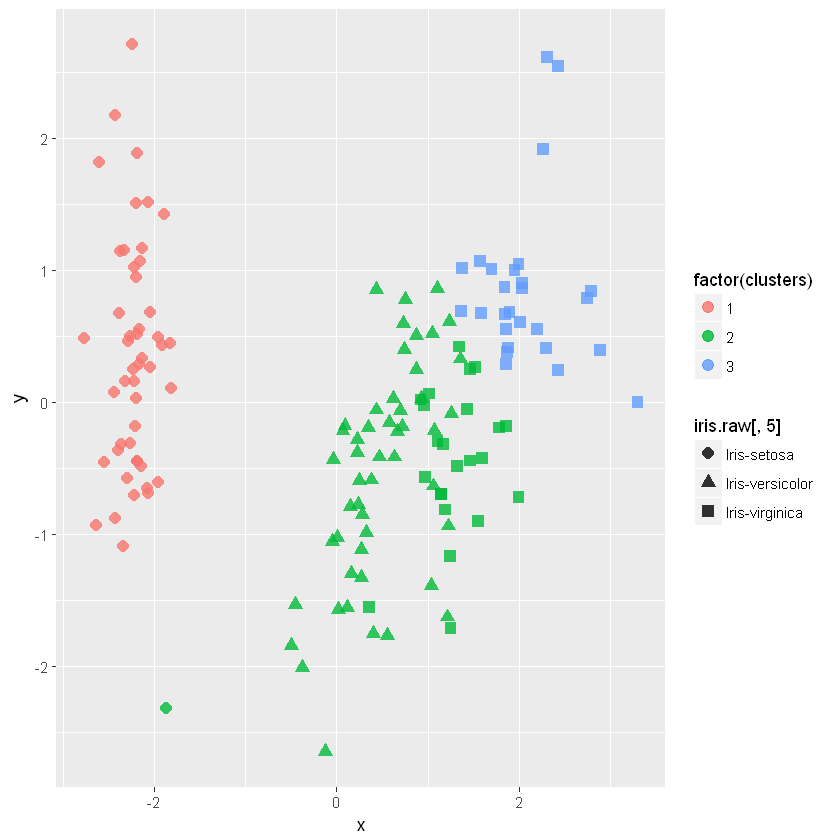

In [11]:
mds=cmdscale(iris.e,k=2,eig=T)
x = mds$points[,1]
y = mds$points[,2]

library(ggplot2)
p=ggplot(data.frame(x,y),aes(x,y))
p+geom_point(size=3, alpha=0.8, aes(colour=factor(clusters),
             shape=iris.raw[,5]))

### 附：全联动HC聚类图

作为对比。全联动 NbClust 投票结果是3类，在此不再列出。

clusters
 1  2  3 
49 24 77 

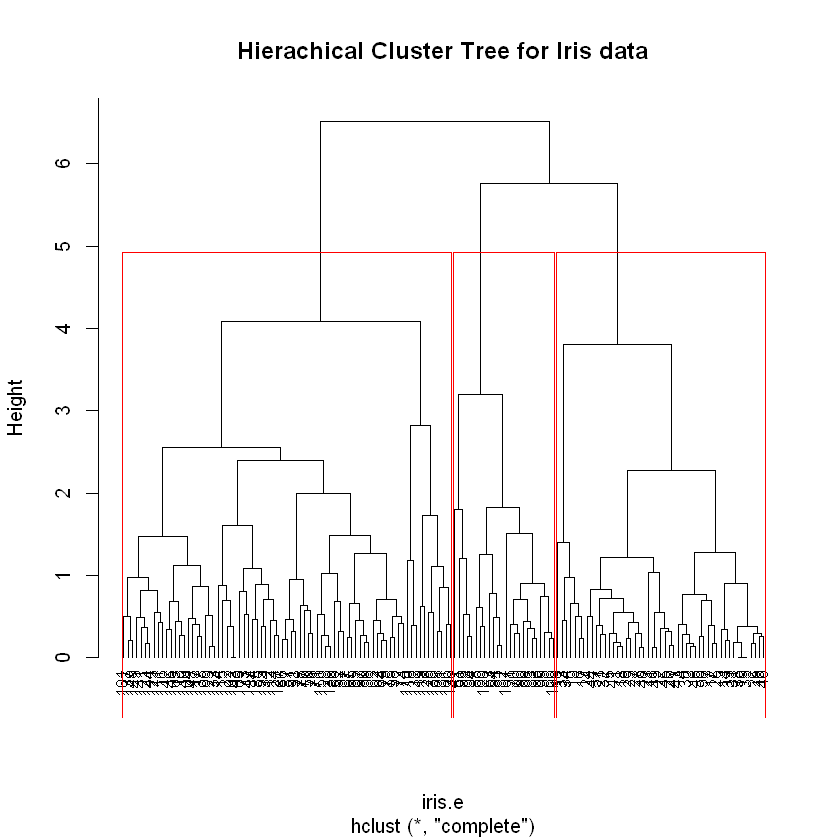

In [12]:
dist_method <- "euclidean"
cluster_method <- "complete"

iris.e <- dist(iris.scaled, method=dist_method)
iris.hc <- hclust(iris.e, method=cluster_method)

cluster_num <- 3
clusters <- cutree(iris.hc, k=cluster_num)
table(clusters)  # 每类多少个值

# 画出矩形框
plot(iris.hc, hang=-1, cex=.8, main="Hierachical Cluster Tree for Iris data")
rect.hclust(iris.hc, k=cluster_num)

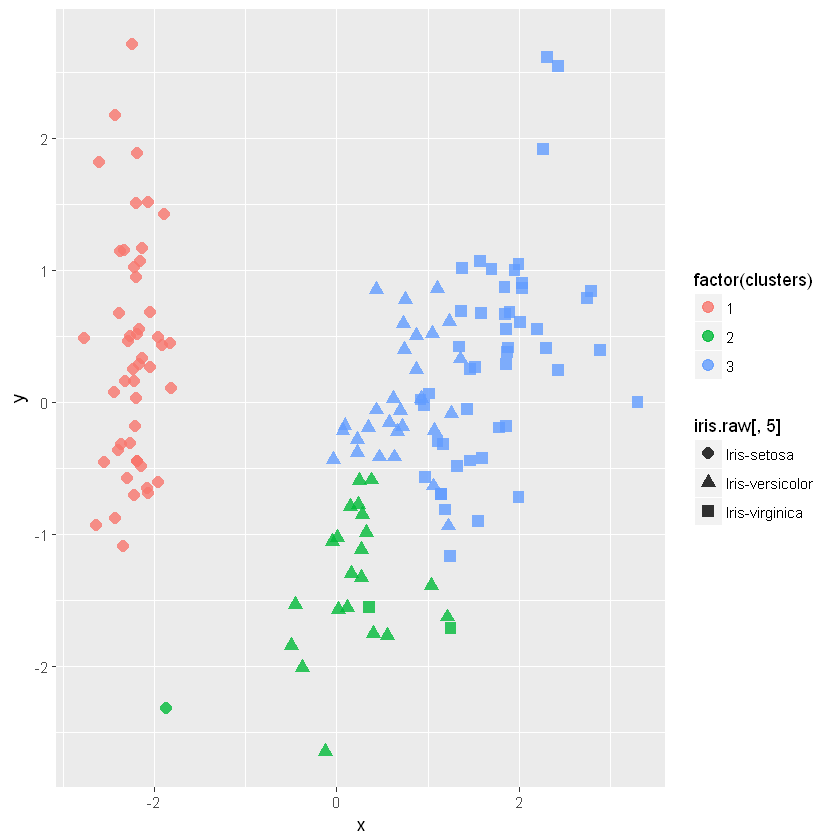

In [13]:
mds=cmdscale(iris.e,k=2,eig=T)
x = mds$points[,1]
y = mds$points[,2]

p=ggplot(data.frame(x,y),aes(x,y))
p+geom_point(size=3, alpha=0.8, aes(colour=factor(clusters),
             shape=iris.raw[,5]))

可以看出，setosa 聚类非常好； virginica 与 versicolor 的效果则是惨不忍睹。

*本文内容大量参考：*

1. 《R 语言实战》第二版 第16章。
2. [此网页](http://xccds1977.blogspot.com/2012/01/r.html)